<a href="https://colab.research.google.com/github/KirtiRanjan26/Complete-Data-Science/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_index= pd.read_csv('/content/economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
# drop unnecessary column
df_index.drop(['Unnamed: 0','year','month'],axis=1,inplace=True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
# checking for null value
df_index.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


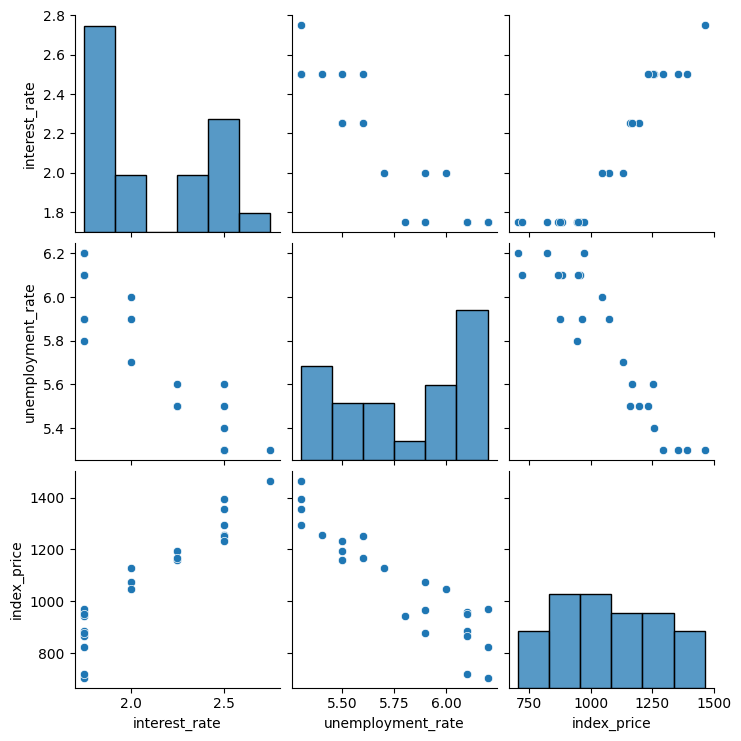

In [7]:
# Data visualization and correlation Analysis
sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


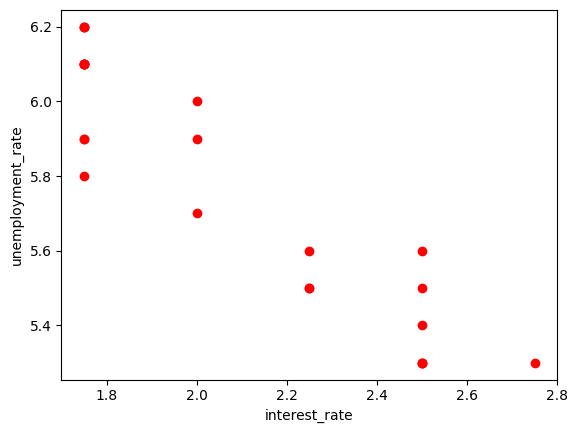

In [9]:
#scatter plot for feature relationship
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')
plt.show()

In [10]:
# selecting dependent and independent feature

#this is the oneway
X= df_index[['interest_rate','unemployment_rate']]
Y=df_index['index_price']

# X= df_index[[:,:-1]]
# Y= df_index[:,-1]


In [11]:
# Train-Test spilt
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=42)



<Axes: xlabel='interest_rate', ylabel='index_price'>

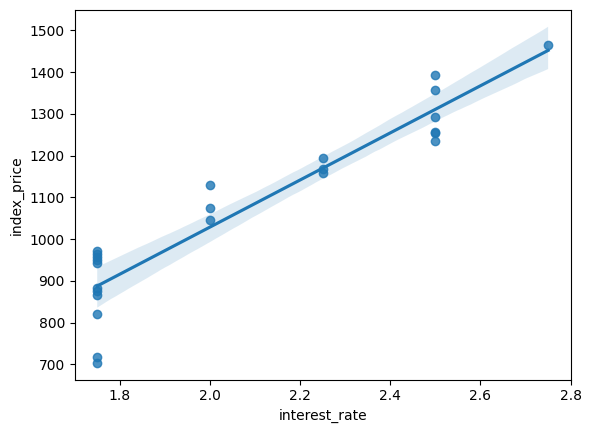

In [12]:
# Regression plot with saborn
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])



<Axes: xlabel='unemployment_rate', ylabel='index_price'>

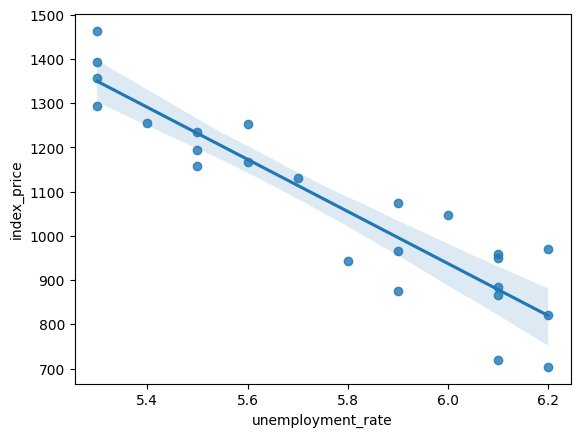

In [13]:
sns.regplot(x=df_index['unemployment_rate'],y=df_index['index_price'])


In [14]:
# standard Scalling
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
X_train= Scaler.fit_transform(X_train)
X_test= Scaler.transform(X_test)

In [15]:
# model training
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,Y_train)


LinearRegression()

In [16]:
# cross validation with crossvalscore
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)
np.mean(validation_score)


np.float64(-6492.483626060827)

In [19]:
Y_pred = regression.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)

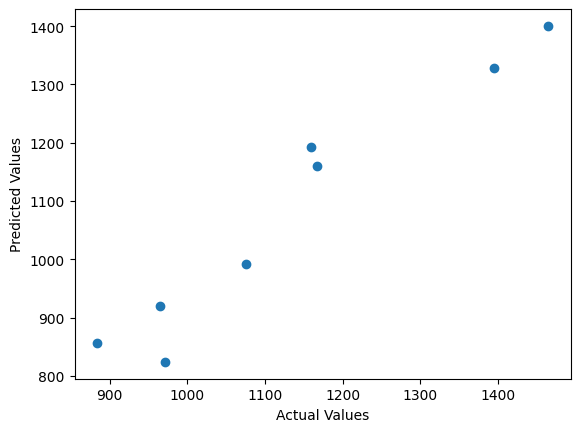

/tmp/ipython-input-3485654666.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


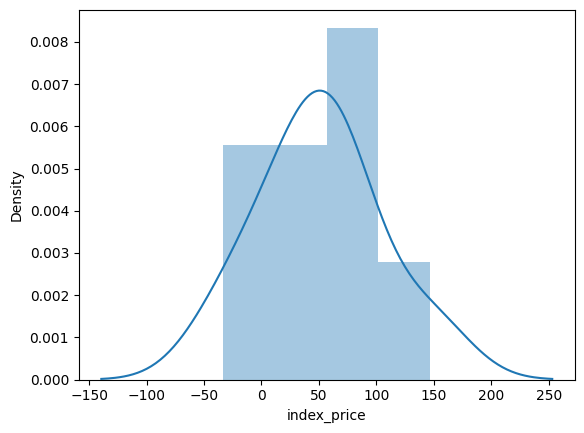

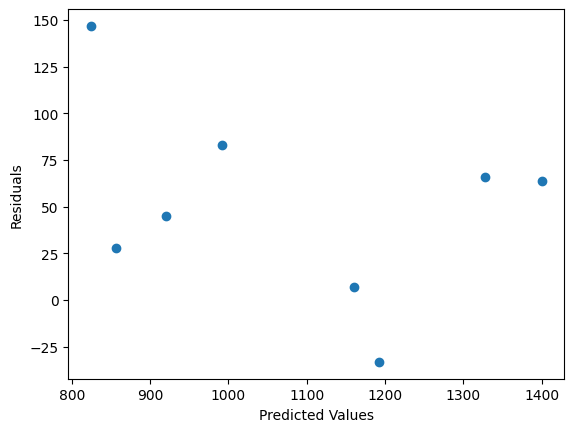

In [23]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

residuals = Y_test - Y_pred
sns.distplot(residuals, kde=True)
plt.show()

plt.scatter(Y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [24]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            index_price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     53.77
Date:                Thu, 11 Sep 2025   Prob (F-statistic):           5.17e-07
Time:                        12:57:46   Log-Likelihood:                -90.047
No. Observations:                  16   AIC:                             186.1
Df Residuals:                      13   BIC:                             188.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1037.6875     18.663     55.602      0.000     997.369    1078.006
x1            96.2869     45.862      2.099      0.056      -2.792     195.366
x2          -101.5702     45.862     -2.215      0.045    -200.649      -2.491
==============================================================================
Omnibus:                        0.466   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.792   Jarque-Bera (JB):                0.412
Skew:                          -0.327   Prob(JB):                        0.814
Kurtosis:                       2.563   Cond. No.                         4.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
regression.coef_

array([  96.28689501, -101.57024663])